<a href="https://colab.research.google.com/github/shernandezg20/practica02InteligenciaArtificial/blob/main/Practica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Segunda-práctica:-Aspectos-prácticos-de-las-redes-neuronales" data-toc-modified-id="Segunda-práctica:-Aspectos-prácticos-de-las-redes-neuronales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Segunda práctica: Aspectos prácticos de las redes neuronales</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Obtención-de-los-datos-y-pre-processing" data-toc-modified-id="Obtención-de-los-datos-y-pre-processing-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Obtención de los datos y pre-processing</a></span></li></ul></li></ul></li><li><span><a href="#Consideraciones-iniciales" data-toc-modified-id="Consideraciones-iniciales-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Consideraciones iniciales</a></span><ul class="toc-item"><li><span><a href="#Train-validation-test-split" data-toc-modified-id="Train-validation-test-split-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Train-validation-test split</a></span></li><li><span><a href="#Un-error-común-con-modelos-de-Keras" data-toc-modified-id="Un-error-común-con-modelos-de-Keras-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Un error común con modelos de Keras</a></span></li><li><span><a href="#Análisis-de-resultados" data-toc-modified-id="Análisis-de-resultados-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Análisis de resultados</a></span></li></ul></li><li><span><a href="#1.-Unidades-de-activación" data-toc-modified-id="1.-Unidades-de-activación-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>1. Unidades de activación</a></span></li><li><span><a href="#2.-Inicialización-de-parámetros" data-toc-modified-id="2.-Inicialización-de-parámetros-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>2. Inicialización de parámetros</a></span></li><li><span><a href="#3.-Optimizadores" data-toc-modified-id="3.-Optimizadores-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>3. Optimizadores</a></span></li><li><span><a href="#4.-Regularización-y-red-final-(2.5-puntos)" data-toc-modified-id="4.-Regularización-y-red-final-(2.5-puntos)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>4. Regularización y red final <em>(2.5 puntos)</em></a></span><ul class="toc-item"><li><span><a href="#Evaluación-del-modelo-en-datos-de-test" data-toc-modified-id="Evaluación-del-modelo-en-datos-de-test-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Evaluación del modelo en datos de test</a></span></li></ul></li></ul></li></ul></div>

# Segunda práctica: Aspectos prácticos de las redes neuronales

En esta segunda parte, vamos a continuar desarrollando el problema de Fashion MNIST, con el objetivo de entender los aspectos prácticos del entrenamiento de redes neuronales.

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**.

In [1]:
# Puedes añadir todos los imports adicionales que necesites aquí
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt

#### Obtención de los datos y pre-processing

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Consideraciones iniciales

### Train-validation-test split

En todos los modelos que entrenemos, vamos a partir los datos de training (x_train) en dos sets: training y validación. De este modo, al final tendremos tres datasets distintos: training, validation, y test. Esta es una estrategia común en el aprendizaje automático, en la que los datos de test (o held-out data) se
"esconden" hasta el final. Los datos de validación se utilizan para estimar cómo de bien están funcionando nuestros modelos y para observar si estamos cayendo en overfitting. Esto nos permite cambiar hiperparámetros y probar distintas arquitecturas **sabiendo que no estamos utilizando información del test set para "optimizar" los resultados en éste** (si eligiéramos nuestro mejor modelo en base a los resultados de test, estaríamos "haciendo trampas", ya que se ha utilizado la información contenida en éste para elegir el modelo y las métricas reportadas serían optimistas).

Para utilizar un split training-validation data durante el entrenamiento, podemos partir nosotros mismos los datos o dejar que Keras lo haga. Podéis ver cómo hacer estas particiones en la documentación de *fit*.

**Requisito: En todos los entrenamientos de esta práctica, se requiere utilizar el 20% de los datos en x_train como  conjunto de datos de validación**

### Un error común con modelos de Keras

En esta práctica entrenaremos varios modelos para comparar resultados. Un error común en Keras es no instanciar un nuevo modelo cada vez que hacemos un nuevo entrenamiento. Al hacer

*model = Sequential()*

*model.add(lo que sea)  # Definición del modelo*

*model.fit()*

si queremos entrenar un nuevo modelo o el mismo modelo otra vez, es necesario volver a inicializar el modelo con model = Sequential(). Si olvidamos este paso y volvemos a hacer fit(), el modelo seguirá entrenando por donde se quedó en el último fit().

### Análisis de resultados

A la hora de escribir las respuestas y los análisis pedidos, es importante presentar las conclusiones de manera adecuada a partir de lo visto en nuestros experimentos. Los Jupyter Notebook son una herramienta imprescindible para *data scientists* e ingenieros de Machine Learning para presentar los resultados, incluyendo soporte para incluir gráficas y elementos visuales. Podéis explicar vuestras observaciones del modo que consideréis adecuado, si bien recomendamos la utilización de gráficas para evaluar los entrenamientos y comparar resultados.

Como ayuda, las siguientes funciones pueden resultar interesantes a la hora de evaluar resultados. Todas ellas utilizan el objeto *history* que podéis obtener como salida del método *fit()* de Keras:

history = model.fit(x_train, y_train, ...)

Por supuesto, podéis modificarlas y utilizarlas como prefiráis para crear vuestros propios informes.

In [3]:
def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()

def plot_compare_losses(history1, history2, name1="Red 1",
                        name2="Red 2", title="Graph title"):
    """Compara losses de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1,
                'Train ' + name2, 'Val ' + name2],
               loc='upper right')
    plt.show()

def plot_compare_accs(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    """Compara accuracies de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['acc'], color="green")
    plt.plot(history1.history['val_acc'], 'r--', color="green")
    plt.plot(history2.history['acc'], color="blue")
    plt.plot(history2.history['val_acc'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1,
                'Train ' + name2, 'Val ' + name2],
               loc='lower right')
    plt.show()

# Nota: podéis cambiar los números aquí presentes y ejecutar esta línea si queréis cambiar el tamaño
# de las gráficas
# matplotlib.rcParams['figure.figsize'] = [8, 8]


## 1. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Las funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Ejercicio 1 *(2.5 puntos)***: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7772 - loss: 0.6610 - val_accuracy: 0.8539 - val_loss: 0.4176
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8555 - loss: 0.3969 - val_accuracy: 0.8647 - val_loss: 0.3783
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8729 - loss: 0.3499 - val_accuracy: 0.8633 - val_loss: 0.3661
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8820 - loss: 0.3195 - val_accuracy: 0.8770 - val_loss: 0.3371
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8908 - loss: 0.2986 - val_accuracy: 0.8774 - val_loss: 0.3420
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8931 - loss: 0.2876 - val_accuracy: 0.8775 - val_loss: 0.3409
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8983 - loss: 0.2708 - val_accuracy: 0.8852 - val_loss: 0.3271
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9025 - loss: 0.26

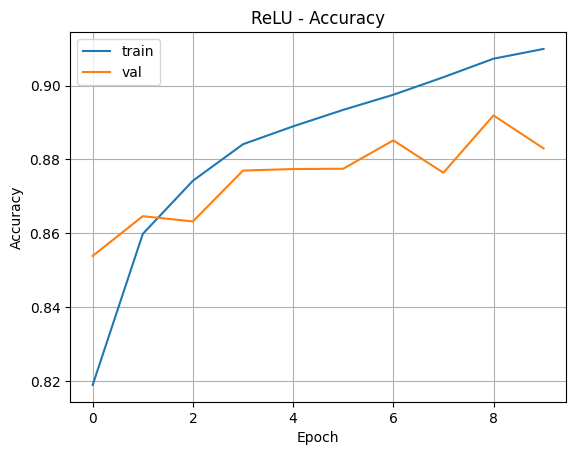

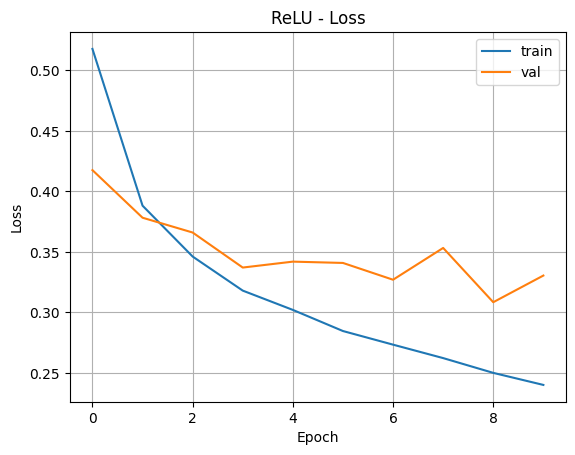

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7535 - loss: 0.7739 - val_accuracy: 0.8340 - val_loss: 0.4550
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8508 - loss: 0.4144 - val_accuracy: 0.8583 - val_loss: 0.3887
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8695 - loss: 0.3645 - val_accuracy: 0.8638 - val_loss: 0.3716
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8763 - loss: 0.3453 - val_accuracy: 0.8734 - val_loss: 0.3489
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8830 - loss: 0.3241 - val_accuracy: 0.8769 - val_loss: 0.3389
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8906 - loss: 0.3050 - val_accuracy: 0.8795 - val_loss: 0.3353
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8973 - loss: 0.2840 - val_accuracy: 0.8830 - val_loss: 0.3252
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8964 - loss: 0.2818

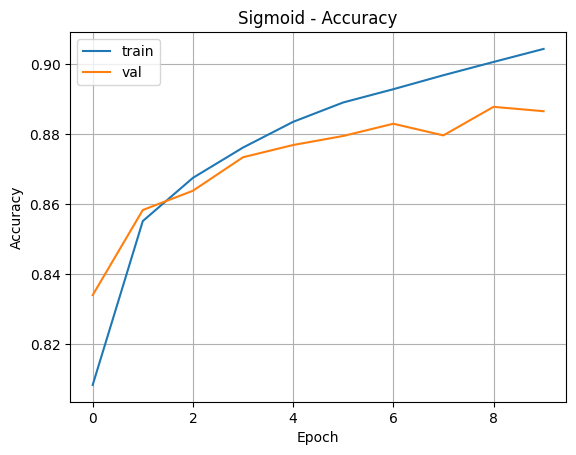

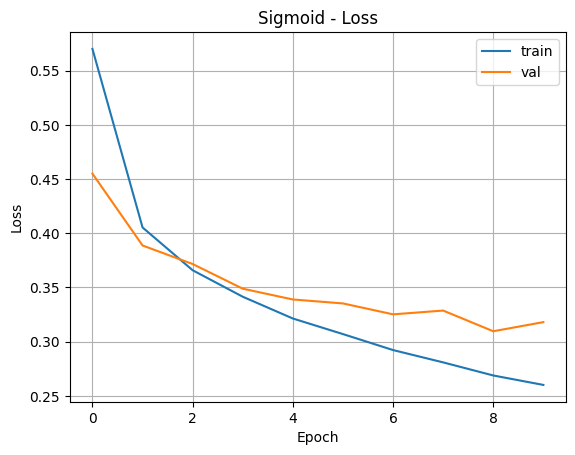

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7801 - loss: 0.6264 - val_accuracy: 0.8510 - val_loss: 0.4067
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8634 - loss: 0.3832 - val_accuracy: 0.8716 - val_loss: 0.3561
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8743 - loss: 0.3451 - val_accuracy: 0.8677 - val_loss: 0.3635
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8833 - loss: 0.3192 - val_accuracy: 0.8770 - val_loss: 0.3385
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8903 - loss: 0.2962 - val_accuracy: 0.8808 - val_loss: 0.3181
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8953 - loss: 0.2799 - val_accuracy: 0.8824 - val_loss: 0.3209
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9020 - loss: 0.2666 - val_accuracy: 0.8822 - val_loss: 0.3210
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9005 - loss: 0.2623

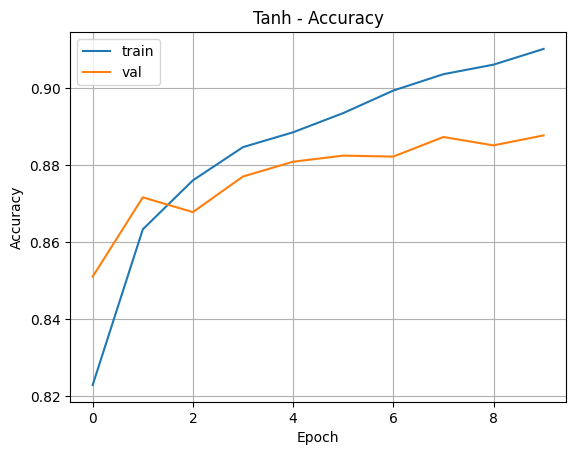

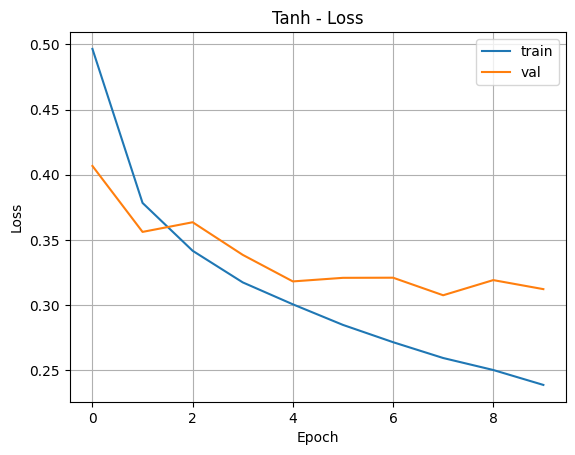

In [4]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto
from keras.models import Sequential
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

def plot_acc(history, title="Accuracy"):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_loss(history, title="Loss"):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Modelo con ReLU
model_relu = Sequential()
model_relu.add(Flatten(input_shape=(28, 28)))
model_relu.add(Dense(128, activation='relu'))
model_relu.add(Dense(10, activation='softmax'))

model_relu.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

history_relu = model_relu.fit(x_train, y_train,
                              validation_split=0.2,
                              epochs=10,
                              batch_size=32)

plot_acc(history_relu, title="ReLU - Accuracy")
plot_loss(history_relu, title="ReLU - Loss")


#sigmoid
model_sigmoid = Sequential()
model_sigmoid.add(Flatten(input_shape=(28, 28)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(10, activation='softmax'))

model_sigmoid.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

history_sigmoid = model_sigmoid.fit(x_train, y_train,
                                    validation_split=0.2,
                                    epochs=10,
                                    batch_size=32)

plot_acc(history_sigmoid, title="Sigmoid - Accuracy")
plot_loss(history_sigmoid, title="Sigmoid - Loss")

#Tanh
model_tanh = Sequential()
model_tanh.add(Flatten(input_shape=(28, 28)))
model_tanh.add(Dense(128, activation='tanh'))
model_tanh.add(Dense(10, activation='softmax'))

model_tanh.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

history_tanh = model_tanh.fit(x_train, y_train,
                              validation_split=0.2,
                              epochs=10,
                              batch_size=32)

plot_acc(history_tanh, title="Tanh - Accuracy")
plot_loss(history_tanh, title="Tanh - Loss")


## 2. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 2 *(2.5 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7759 - loss: 0.6530 - val_accuracy: 0.8337 - val_loss: 0.4625
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8586 - loss: 0.3968 - val_accuracy: 0.8728 - val_loss: 0.3613
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8728 - loss: 0.3514 - val_accuracy: 0.8747 - val_loss: 0.3472
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8815 - loss: 0.3218 - val_accuracy: 0.8677 - val_loss: 0.3576
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8909 - loss: 0.2957 - val_accuracy: 0.8714 - val_loss: 0.3496
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8931 - loss: 0.2873 - val_accuracy: 0.8857 - val_loss: 0.3195
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8980 - loss: 0.2683 - val_accuracy: 0.8831 - val_loss: 0.3330
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9028 - loss: 0.2608

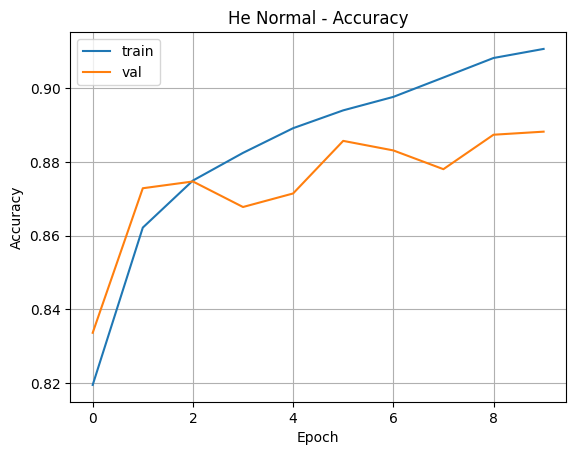

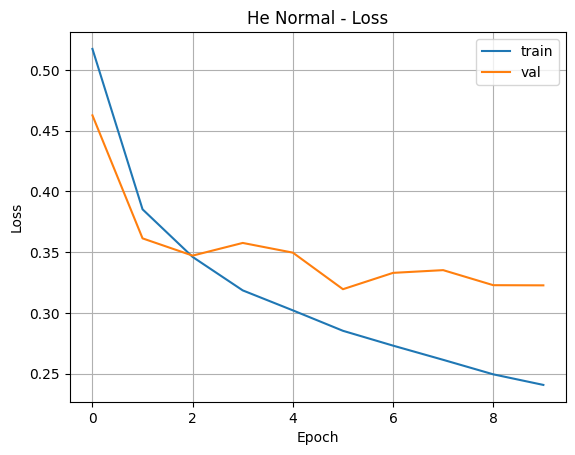

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7791 - loss: 0.6517 - val_accuracy: 0.8519 - val_loss: 0.4159
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8581 - loss: 0.4004 - val_accuracy: 0.8472 - val_loss: 0.4120
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8735 - loss: 0.3527 - val_accuracy: 0.8701 - val_loss: 0.3592
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8813 - loss: 0.3210 - val_accuracy: 0.8728 - val_loss: 0.3508
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8912 - loss: 0.2969 - val_accuracy: 0.8800 - val_loss: 0.3332
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8969 - loss: 0.2820 - val_accuracy: 0.8858 - val_loss: 0.3191
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8986 - loss: 0.2739 - val_accuracy: 0.8879 - val_loss: 0.3269
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9069 - loss: 0.24

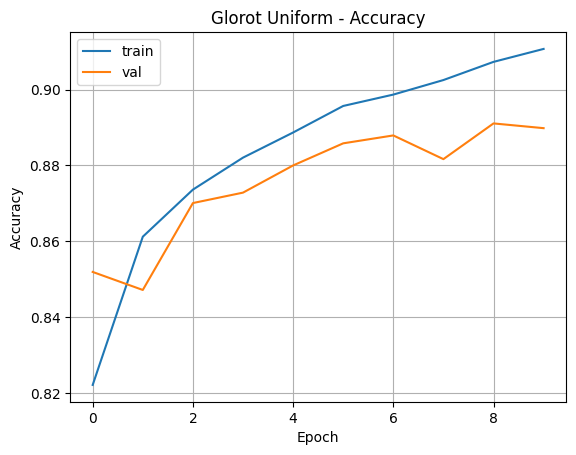

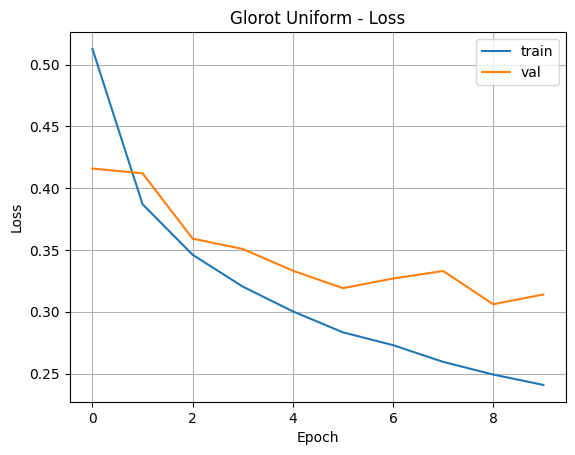

In [5]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto
from keras.initializers import HeNormal

model_he = Sequential()
model_he.add(Flatten(input_shape=(28, 28)))
model_he.add(Dense(128, activation='relu', kernel_initializer=HeNormal()))
model_he.add(Dense(10, activation='softmax'))

model_he.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

history_he = model_he.fit(x_train, y_train,
                          validation_split=0.2,
                          epochs=10,
                          batch_size=32)

plot_acc(history_he, title="He Normal - Accuracy")
plot_loss(history_he, title="He Normal - Loss")

#Glorot Uniform
from keras.initializers import GlorotUniform

model_glorot = Sequential()
model_glorot.add(Flatten(input_shape=(28, 28)))
model_glorot.add(Dense(128, activation='relu', kernel_initializer=GlorotUniform()))
model_glorot.add(Dense(10, activation='softmax'))

model_glorot.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history_glorot = model_glorot.fit(x_train, y_train,
                                  validation_split=0.2,
                                  epochs=10,
                                  batch_size=32)

plot_acc(history_glorot, title="Glorot Uniform - Accuracy")
plot_loss(history_glorot, title="Glorot Uniform - Loss")


## 3. Optimizadores

**Ejercicio 3 *(2.5 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6594 - loss: 1.0899 - val_accuracy: 0.7875 - val_loss: 0.5927
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8145 - loss: 0.5561 - val_accuracy: 0.8245 - val_loss: 0.5084
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8312 - loss: 0.4970 - val_accuracy: 0.8332 - val_loss: 0.4728
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8400 - loss: 0.4646 - val_accuracy: 0.8382 - val_loss: 0.4632
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8462 - loss: 0.4432 - val_accuracy: 0.8450 - val_loss: 0.4399
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8507 - loss: 0.4297 - val_accuracy: 0.8515 - val_loss: 0.4277
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8546 - loss: 0.4243 - val_accuracy: 0.8561 - val_loss: 0.4178
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8604 - loss: 0.4034

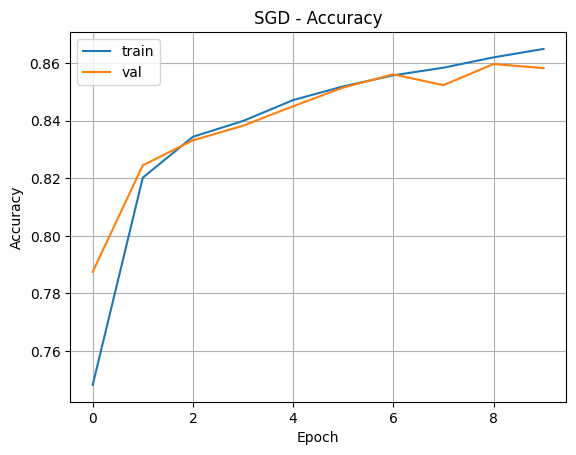

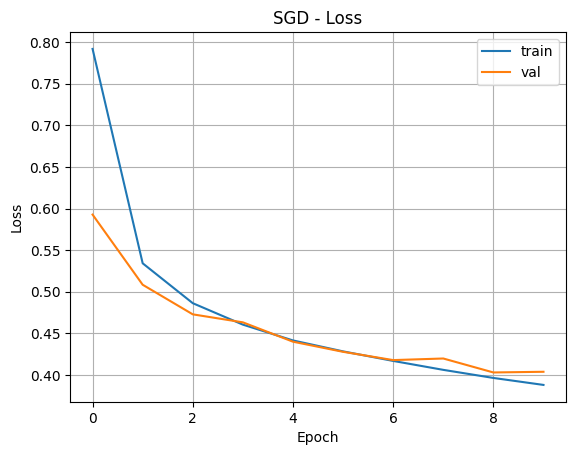

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7632 - loss: 0.6789 - val_accuracy: 0.8314 - val_loss: 0.4602
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8606 - loss: 0.3916 - val_accuracy: 0.8534 - val_loss: 0.4075
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8752 - loss: 0.3500 - val_accuracy: 0.8645 - val_loss: 0.3850
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8796 - loss: 0.3317 - val_accuracy: 0.8773 - val_loss: 0.3499
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8841 - loss: 0.3152 - val_accuracy: 0.8788 - val_loss: 0.3551
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8903 - loss: 0.3016 - val_accuracy: 0.8693 - val_loss: 0.3929
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8951 - loss: 0.2897 - val_accuracy: 0.8826 - val_loss: 0.3503
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9004 - loss: 0.2816

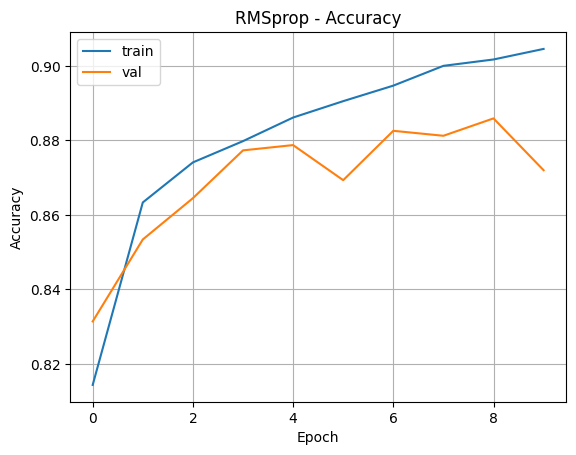

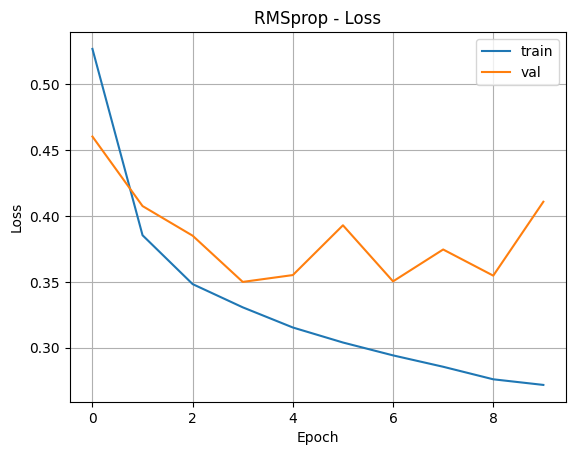

In [6]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

#SGD
model_sgd = Sequential()
model_sgd.add(Flatten(input_shape=(28, 28)))
model_sgd.add(Dense(128, activation='relu'))
model_sgd.add(Dense(10, activation='softmax'))

model_sgd.compile(optimizer='sgd',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history_sgd = model_sgd.fit(x_train, y_train,
                            validation_split=0.2,
                            epochs=10,
                            batch_size=32)

plot_acc(history_sgd, title="SGD - Accuracy")
plot_loss(history_sgd, title="SGD - Loss")

#rmspROP
model_rmsprop = Sequential()
model_rmsprop.add(Flatten(input_shape=(28, 28)))
model_rmsprop.add(Dense(128, activation='relu'))
model_rmsprop.add(Dense(10, activation='softmax'))

model_rmsprop.compile(optimizer='rmsprop',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

history_rmsprop = model_rmsprop.fit(x_train, y_train,
                                    validation_split=0.2,
                                    epochs=10,
                                    batch_size=32)

plot_acc(history_rmsprop, title="RMSprop - Accuracy")
plot_loss(history_rmsprop, title="RMSprop - Loss")


## 4. Regularización y red final *(2.5 puntos)*

**Ejercicio 4.1**: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7410 - loss: 0.9047 - val_accuracy: 0.8326 - val_loss: 0.5708
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8314 - loss: 0.5803 - val_accuracy: 0.8479 - val_loss: 0.5123
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8357 - loss: 0.5421 - val_accuracy: 0.8494 - val_loss: 0.5018
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8380 - loss: 0.5290 - val_accuracy: 0.8550 - val_loss: 0.4817
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8415 - loss: 0.5196 - val_accuracy: 0.8485 - val_loss: 0.4927
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8420 - loss: 0.5270 - val_accuracy: 0.8537 - val_loss: 0.4882
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8478 - loss: 0.5118 - val_accuracy: 0.8433 - val_loss: 0.5074
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8441 - loss: 0.5

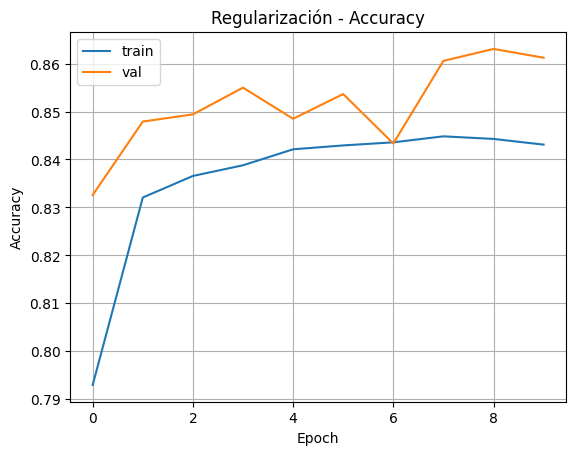

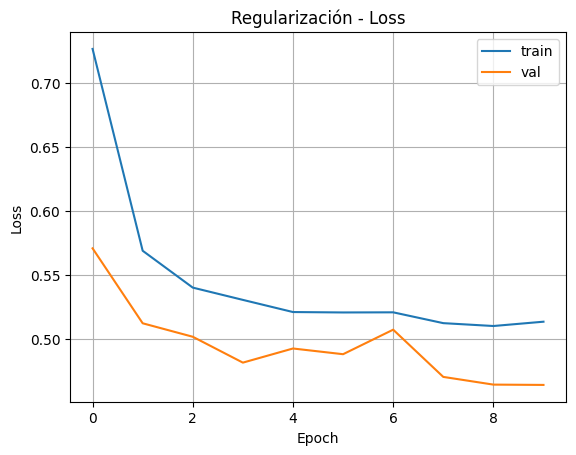

In [7]:
## Tu modelo y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

from keras.layers import Dropout
from keras.regularizers import l2

model_reg = Sequential()
model_reg.add(Flatten(input_shape=(28, 28)))
model_reg.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model_reg.add(Dropout(0.3))
model_reg.add(Dense(10, activation='softmax'))

model_reg.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history_reg = model_reg.fit(x_train, y_train,
                            validation_split=0.2,
                            epochs=10,
                            batch_size=32)

plot_acc(history_reg, title="Regularización - Accuracy")
plot_loss(history_reg, title="Regularización - Loss")


### Evaluación del modelo en datos de test

Una vez elegido el que creemos que es nuestro mejor modelo a partir de la estimación que hemos visto en los datos de validación, es hora de utilizar los datos de test para ver cómo se comporta nuestro modelo ante nuevos datos. Si hemos hecho bien las cosas, este número debería ser parecido al valor de nuestra estimación vista en los datos de validación.

**Pregunta 4.2**. Utilizando nuestro mejor modelo, obtener la accuracy resultante en el dataset de test. Comentar este resultado.

In [8]:
## Tu código y comentarios de texto aquí
test_loss, test_acc = model_reg.evaluate(x_test, y_test)
print(f"Pérdida en test: {test_loss:.4f}")
print(f"Precisión en test: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8526 - loss: 0.4807
Pérdida en test: 0.4899
Precisión en test: 0.8498
